# User-Defined Data Structures

In computer science, a data structure is a logical and abstract representation of how data are organized, stored, and retrieved in computer memory; so that it can be used effectively.


**User-defined data structures** : Data structures that aren’t supported by python but can be implemented using the language's basic programming constructs.

In this notebook an easy implementation of some of these.

## 1. Data structure implementation: Directed Graph




    A -> B
    A -> C
    B -> C
    B -> D
    B -> E
    D -> E

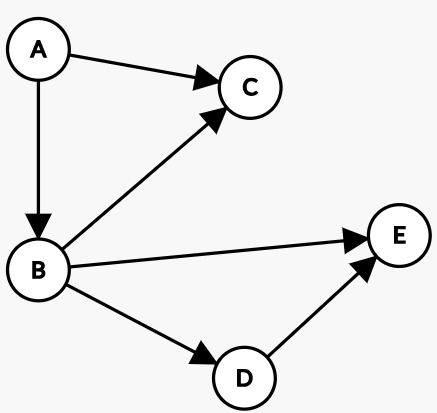

In [ ]:
# Exploit the key-value structure of a dictionary to form any graph

graph = {'A': ['B', 'C'],
         'B': ['C', 'D', 'E'],
         'C': [],
         'D': ['E'],
         'E': [] }

print(graph)

print(graph['B'])
print(graph['E'])

{'A': ['B', 'C'], 'B': ['C', 'D', 'E'], 'C': [], 'D': ['E'], 'E': []}
['C', 'D', 'E']
[]


In [ ]:
# Each node corresponds to an informative content stored in this other dictionary

content_graph = {'A': "K23Fcv$RO&7r",
                 'B': 1.07,
                 'C': None,
                 'D': ["Name","Surname", 12345,"City","Age"],
                 'E': None}

print(content_graph)
print(content_graph['D'])
print(content_graph['D'][3])
print(content_graph['E'])

{'A': 'K23Fcv$RO&7r', 'B': 1.07, 'C': None, 'D': ['Name', 'Surname', 12345, 'City', 'Age'], 'E': None}
['Name', 'Surname', 12345, 'City', 'Age']
City
None


In [ ]:
# Function that will output a list containing all the oriented edges

def edges(graph):
    edges = []
    for node in graph: # the for loop iterates over all the keys in the graph-dictionary : A,B,C,D,E
        for i in graph[node]:  # here we work on the values of the graph-dictionary : ['B', 'C'], ['C', 'D', 'E'], ...
            if (i, node) not in edges:
                 edges.append((node, i))
    return edges

print(edges(graph))

[('A', 'B'), ('A', 'C'), ('B', 'C'), ('B', 'D'), ('B', 'E'), ('D', 'E')]


 Find all the paths between two nodes of a graph.

In [ ]:
# Paths-finding algorithm
# Find all the possible paths that can be traced on a graph starting from one node to reach another,
# exploiting the connections present between them.
# Basically : a sequence of nodes P = ( n1_start, n2, n3, …, nn_end ) adjacent connected to each other
# which defines a possible path from a starting node n1_start to a destination node nn_end.

def find_path(graph, start, end, path=[]):

      path = path + [start]

      if start == end:
          return [path]

      if start not in graph.keys():
         return None

      if end not in graph.keys():
         return None

      paths = []
      for node in graph[start]:
          if node not in path:
              subpaths = find_path(graph, node, end, path)

              for subpath in subpaths:
                    paths.append(subpath)

      return paths

f = find_path(graph, 'A', 'A')
print("Possible path from 'A' to 'A' : " , f)

f = find_path(graph, 'Z', 'D')
print("Possible path from 'Z' to 'D' : " , f)

f = find_path(graph, 'A', 'Z')
print("Possible path from 'A' to 'Z' : " , f)

f = find_path(graph, 'A', 'E')
print("Possible path from 'A' to 'E' : " , f)

f = find_path(graph, 'E', 'A')
print("Possible path from 'E' to 'A' : " , f)

Possible path from 'A' to 'A' :  [['A']]
Possible path from 'Z' to 'D' :  None
Possible path from 'A' to 'Z' :  None
Possible path from 'A' to 'E' :  [['A', 'B', 'D', 'E'], ['A', 'B', 'E']]
Possible path from 'E' to 'A' :  []


### Explanation of the Paths-finding recursive code

In [ ]:
# Explanation of the recursive code

def find_path_expl(graph, start, end, path=[]):
      print("Input value :  find_path_expl(start, end, path)", (start, end, path) )

      path = path + [start]
      print("° Value of path updated: path = path + [start] = ",path )

      if start == end:
          print("\t*\t*\t start == end")
          return [path]

      if start not in graph.keys():
         print("\t*\t*\t start not in graph.keys()")
         return None

      if end not in graph.keys():
         print("\t*\t*\t end not in graph.keys():")
         return None

      paths = []
      print(">> Enter in Outer loop with graph[start] =",graph[start] )
      for node in graph[start]:  # Note: if graph[start]==[], it does not enter the for loop
          print("Working with node:", node)
          if node not in path:
              print("Node not in path is ", (node not in path))

              print("Recursive call :  find_path_expl(node, end, path)", (node, end, path) )
              subpaths = find_path_expl(graph, node, end, path)
              print("- continue afther resolution of recursive call -\nsubpaths :",subpaths )

              for subpath in subpaths: # Note: if subpaths==[], it does not enter the for loop
                    print("\t inside loop subpath : ", subpath)
                    paths.append(subpath)

      print("ending return :",paths )
      print("")
      return paths


print(graph)
print("")
f = find_path_expl(graph, 'A', 'E')
print("\nPossible path : " , f)

{'A': ['B', 'C'], 'B': ['C', 'D', 'E'], 'C': [], 'D': ['E'], 'E': []}

Input value :  find_path_expl(start, end, path) ('A', 'E', [])
° Value of path updated: path = path + [start] =  ['A']
>> Enter in Outer loop with graph[start] = ['B', 'C']
Working with node: B
Node not in path is  True
Recursive call :  find_path_expl(node, end, path) ('B', 'E', ['A'])
Input value :  find_path_expl(start, end, path) ('B', 'E', ['A'])
° Value of path updated: path = path + [start] =  ['A', 'B']
>> Enter in Outer loop with graph[start] = ['C', 'D', 'E']
Working with node: C
Node not in path is  True
Recursive call :  find_path_expl(node, end, path) ('C', 'E', ['A', 'B'])
Input value :  find_path_expl(start, end, path) ('C', 'E', ['A', 'B'])
° Value of path updated: path = path + [start] =  ['A', 'B', 'C']
>> Enter in Outer loop with graph[start] = []
ending return : []

- continue afther resolution of recursive call -
subpaths : []
Working with node: D
Node not in path is  True
Recursive call :  find

### For more complex graph implementation and resolution
> See : Implementing Dijkstra's Shortest Path Algorithm.

https://benalexkeen.com/implementing-djikstras-shortest-path-algorithm-with-python/



## 2. Data structure implementation: LIFO (Last In First Out) - Stack
An easy implementation

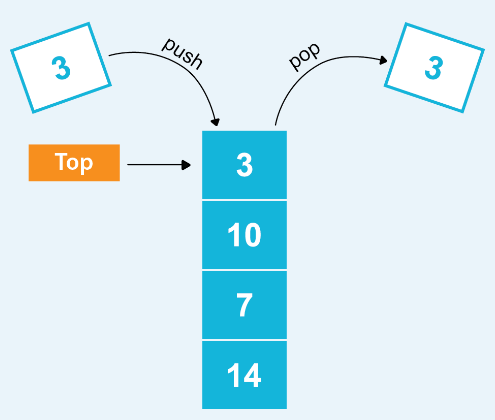


In [ ]:
stack = []

# append() function to push element in the stack
stack.append(14)
stack.append(7)
stack.append(10)
stack.append(3)

print('Initial stack : ',stack)

print('Stack Size:', len(stack))

print('Element on the Top of the stack: ',(stack[len(stack)- 1]) )

# pop() function to pop element from stack in  LIFO order
print('\nElement popped from stack: ', stack.pop())

print('\nCurrent stack : ',stack)

print('Element on the Top of the stack: ',(stack[len(stack)- 1]) )

print('\nElement popped from stack: ', stack.pop())

print('\nCurrent stack : ',stack)

Initial stack :  [14, 7, 10, 3]
Stack Size: 4
Element on the Top of the stack:  3

Element popped from stack:  3

Current stack :  [14, 7, 10]
Element on the Top of the stack:  10

Element popped from stack:  10

Current stack :  [14, 7]


In [ ]:
# Implementation using collections.deque
# Python stack can be implemented using the deque class from the collections module.
# Deque offers O(1) time complexity for append and pop operations compared to list's O(n) time complexity

from collections import deque

stack = deque()

# append() function to push element in the stack
stack.append(14)
stack.append(7)
stack.append(10)
stack.append(3)

print('Initial stack : ',stack)

print('Stack Size:', len(stack))

print('Element on the Top of the stack: ',(stack[len(stack)- 1]) )

# pop() function to pop element from stack in  LIFO order
print('\nElement popped from stack: ', stack.pop())

print('\nCurrent stack : ',stack)


Initial stack :  deque([14, 7, 10, 3])
Stack Size: 4
Element on the Top of the stack:  3

Element popped from stack:  3

Current stack :  deque([14, 7, 10])


## 3. Data structure implementation: FIFO (First-In First-Out) - Queue
An easy implementation

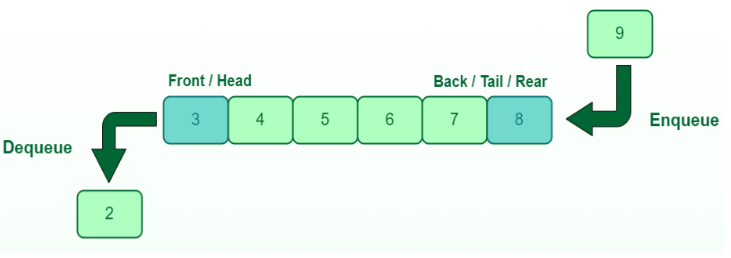


In [ ]:
queue = []
queue.append(2)
queue.append(3)
queue.append(4)
queue.append(5)
queue.append(6)
queue.append(7)
queue.append(8)

print("Initial queue : ", (queue))

print('Queue Size:', len(queue))

print('Front element: ',(queue[0]) )

print('Back element: ',(queue[len(queue)- 1]) )

print("\nElements dequeued from queue : ")
print(queue.pop(0))

print("\nCurrent Queue: ",(queue))
print('Front element: ',(queue[0]) )

print("\nElements dequeued from queue : ")
print(queue.pop(0))

print("\nCurrent Queue: ",(queue))
print('Front element: ',(queue[0]) )

Initial queue :  [2, 3, 4, 5, 6, 7, 8]
Queue Size: 7
Front element:  2
Back element:  8

Elements dequeued from queue : 
2

Current Queue:  [3, 4, 5, 6, 7, 8]
Front element:  3

Elements dequeued from queue : 
3

Current Queue:  [4, 5, 6, 7, 8]
Front element:  4


In [ ]:
# Implementation using collections.deque
# Deque offers O(1) time complexity for append and pop operations compared to list's O(n) time complexity

from collections import deque

queue = deque()

queue.append(2)
queue.append(3)
queue.append(4)
queue.append(5)
queue.append(6)
queue.append(7)
queue.append(8)

print("Initial queue : ", (queue))

print('Queue Size:', len(queue))

print('Front element: ',(queue[0]) )

print('Back element: ',(queue[len(queue)- 1]) )

print("\nElements dequeued from queue : ")
print(queue.popleft())

print("\nCurrent Queue: ",(queue))

Initial queue :  deque([2, 3, 4, 5, 6, 7, 8])
Queue Size: 7
Front element:  2
Back element:  8

Elements dequeued from queue : 
2

Current Queue:  deque([3, 4, 5, 6, 7, 8])


## 4. Data structure implementation:  Binary Tree


A binary tree is a Graph data structure (precisely : directed acyclic graph) where each node can have at most two child nodes, which are referred to as the left child and the right child.


In [9]:
import random
import graphviz

In [26]:
# Creating node class
class Node:

    def __init__(self, data):
        self.data = data          # value  stored in the node
        self.leftChild = None     #  left child node of the current node
        self.rightChild = None    #  right child node of the current node


    def insert(self, data):
        rc = random.choice([1,0])  # In this case the insertion (in right or left place) of node
        # in the binary trees will be random
        if rc == 1:
          if self.leftChild:
                self.leftChild.insert(data)
          else:
                self.leftChild = Node(data)
                return
        else:
            if self.rightChild:
                self.rightChild.insert(data)
            else:
                self.rightChild = Node(data)
                return


def visualize_binary_tree (root):  # Allows display of the binary tree in file png
     dot = graphviz.Digraph()
     dot.node(str(root.data))
     def add_nodes_edges(node):
          if node.leftChild :
              dot.node(str(node.leftChild.data))
              dot.edge(str(node.data), str(node.leftChild.data))
              add_nodes_edges(node.leftChild)
          if node.rightChild:
             dot.node(str(node.rightChild.data))
             dot.edge(str(node.data), str(node.rightChild.data))
             add_nodes_edges(node.rightChild)
     add_nodes_edges(root)
     dot.render('binary_tree', view=True, format='png')
     print("RENDERING", dot.render('binary_tree', view=True, format='png'))


# Creating BinaryTree
root = Node("INIZIO")
root.insert(14)
root.insert(["Ugo","Stam",45])
root.insert(31)
root.insert(10)
root.insert(19.678)
root.insert("$")

visualize_binary_tree(root)

RENDERING binary_tree.png


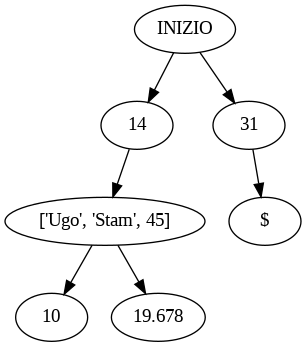


##Useful references

https://www.edureka.co/blog/data-structures-in-python/
